In [1]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display

[&larr; Back to Index](index.html)

# Constant-Q Transform and Chroma

## Constant-Q Transform

Unlike the Fourier transform, but similar to the mel scale, the constant-Q transform ([Wikipedia](http://en.wikipedia.org/wiki/Constant_Q_transform)) uses a logarithmically spaced frequency axis. For more information, read the original paper:

- [Judith C. Brown, "Calculation of a constant Q spectral transform," J. Acoust. Soc. Am., 89(1):425–434, 1991.](http://academics.wellesley.edu/Physics/brown/pubs/cq1stPaper.pdf)

Let's load a file:

In [2]:
x, sr = librosa.load('audio/simple_piano.wav')
ipd.Audio(x, rate=sr)

To compute a constant-Q spectrogram, will use [`librosa.cqt`](https://librosa.github.io/librosa/generated/librosa.core.cqt.html#librosa.core.cqt):

In [3]:
fmin = librosa.midi_to_hz(36)
hop_length = 512
C = librosa.cqt(x, sr=sr, fmin=fmin, n_bins=72, hop_length=hop_length)

Display:

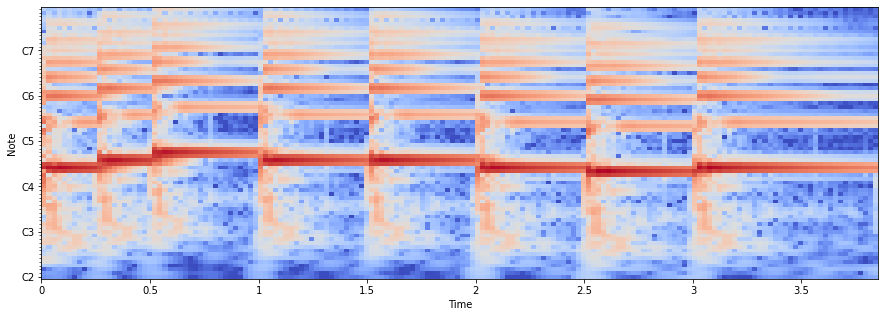

In [5]:
logC = librosa.amplitude_to_db(numpy.abs(C))
plt.figure(figsize=(15, 5))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm');

Note how each frequency bin corresponds to one MIDI pitch number.

## Chroma

A **chroma vector** ([Wikipedia](https://en.wikipedia.org/wiki/Chroma_feature)) (FMP, p. 123) is a typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, ..., B}, is present in the signal.

### [`librosa.feature.chroma_stft`](https://librosa.github.io/librosa/generated/librosa.feature.chroma_stft.html#librosa.feature.chroma_stft)

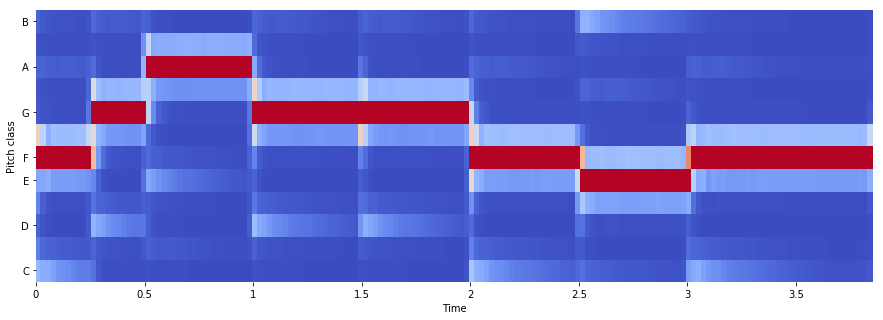

In [5]:
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

### [`librosa.feature.chroma_cqt`](https://librosa.github.io/librosa/generated/librosa.feature.chroma_cqt.html#librosa.feature.chroma_cqt)

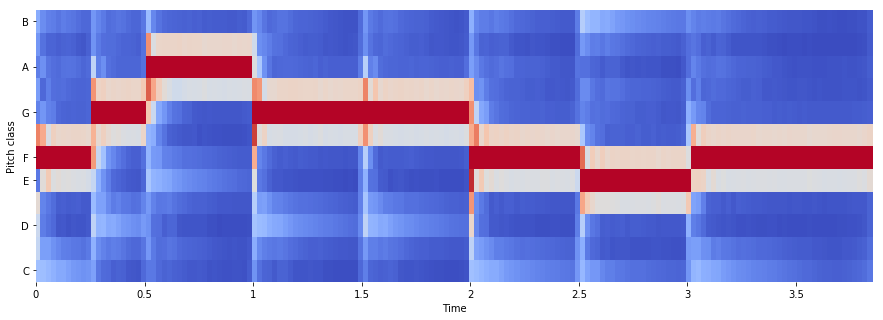

In [6]:
chromagram = librosa.feature.chroma_cqt(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

**Chroma energy normalized statistics (CENS)** (FMP, p. 375). The main idea of CENS features is that taking statistics over large windows smooths local deviations in tempo, articulation, and musical ornaments such as trills and arpeggiated chords. CENS are best used for tasks such as audio matching and similarity.

[`librosa.feature.chroma_cens`](https://librosa.github.io/librosa/generated/librosa.feature.chroma_cens.html#librosa.feature.chroma_cens)

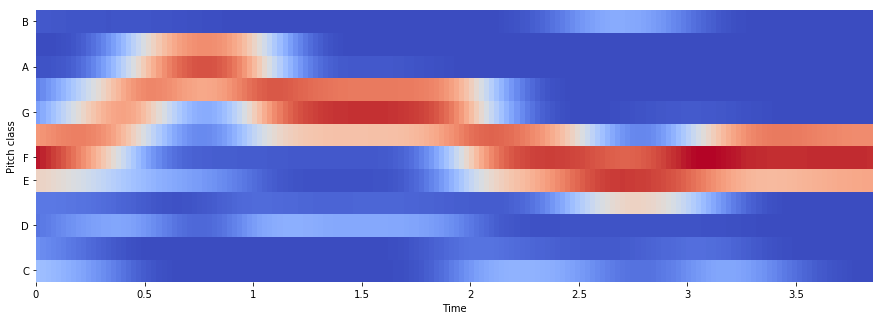

In [7]:
chromagram = librosa.feature.chroma_cens(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

[&larr; Back to Index](index.html)